In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#there is no header in the data so I set the heder argument to None
df = pd.read_csv("data.txt", header=None)

In [3]:
#renaming the columns
df.rename(columns={0:"population", 1:"profit"}, inplace=True)
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


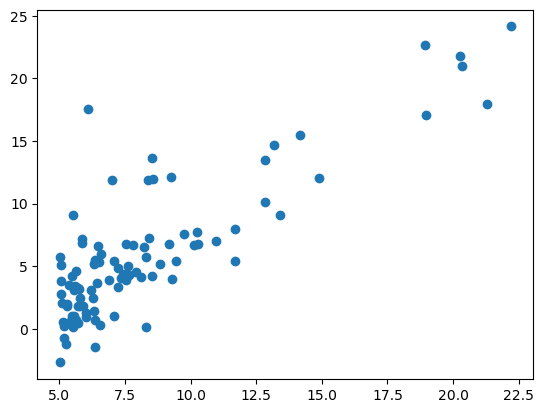

In [4]:
#plotting the data
plt.scatter(df["population"], df["profit"])
plt.show()

In [5]:
#no null values
df.isna().sum()

population    0
profit        0
dtype: int64

In [6]:
#no outliers
#all values are ok
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


# Our data is now clean and ready for the model

In [7]:
#function to compute the gradient for linear regression
def compute_gradient(x, y, w, b):
    
    """
    x: feature values
    y: target values
    w, b: parameters
    """
    
    dj_dw = 0
    dj_db = 0
    m = x.shape[0] #size of the data
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw += ((f_wb-y[i])*x[i])
        dj_db += (f_wb-y[i])
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [8]:
#function that Performs gradient descent to fit w,b
def gradient_descent(x, y, w, b, alpha, num_iter, gradient_function):
    
    """
    x: feature values
    y: target values
    w, b: parameters
    alpha: learning rate
    num_iter: number of iterations to get the local minima for our parameters
    gradient_function: our previous function that computes the gradient for the linear regression
    """
    
    for i in range(num_iter):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db   
    
    return w, b

In [9]:
x_train = np.array(df["population"])
y_train = np.array(df["profit"])

In [10]:
#our local minima values for the parameters
w_final, b_final = gradient_descent(x_train, y_train, 0, 0, 0.01, 10000, compute_gradient)

In [11]:
#values of w and b
print(w_final, b_final)

1.1930336383584828 -3.895780820268237


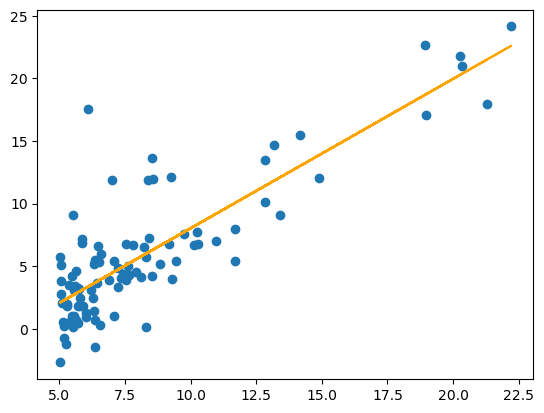

In [12]:
#plotting our model regarding to our data
plt.scatter(df["population"], df["profit"])
plt.plot(df["population"], (df["population"]*w_final+b_final), c="orange")
plt.show()

In [13]:
#fucntion to compute any new data
def compute_profit(x_i, w, b):
    return (x_i*w + b)

In [14]:
#example 1. population=35000
compute_profit(35000, w_final, b_final)

41752.281561726624

In [15]:
#example 2. population=70000
compute_profit(70000, w_final, b_final)

83508.45890427352

# Bonus section
using normal equation as follow:

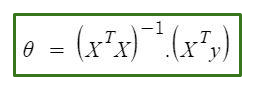